In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from alntk.plotting import default_plot_style
color_cycle = default_plot_style()

# Number of sequences in PDB and UniProt over time

In [18]:
sequences = pd.read_csv('../data/uniprotkb_sequences_available.csv')
sequences.columns = ['x', 'y']
structures = pd.read_csv('../data/pdb_structures_available.csv')
structures.columns = ['x', 'y', 'deltay']

In [19]:
structures

,x,y,deltay
0,2024,229380,15321
1,2023,214059,14455
2,2022,199604,14256
3,2021,185348,12571
4,2020,172777,13985
5,2019,158792,11472
6,2018,147320,11155
7,2017,136165,11059
8,2016,125106,10803
9,2015,114303,9244


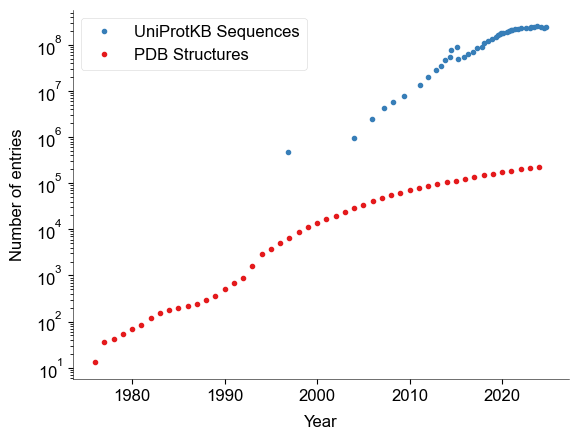

In [33]:
fig = plt.figure()
plt.plot(sequences['x'], sequences['y'], '.', label='UniProtKB Sequences')
plt.plot(structures['x'], structures['y'], '.', label='PDB Structures')
plt.yscale('log')
plt.ylabel('Number of entries')
plt.xlabel('Year')
plt.legend()
plt.show()

fig.savefig('../assets/data_stats.pdf', bbox_inches='tight')

# Number of sequences of serine proteases in UniProt, PDB and EC

In [4]:
function_df = pd.read_csv('../data/serprot_function.tsv', sep='\t', header=None)
function_df.columns = ['ec_code', 'description', 'preferential_cleavage', 'accessions']

In [19]:
def string_to_list(x):
    if type(x) == str:
        return [e.split(",")[1] for e in x[:-3].replace(" ", "").split(";")]
    else:
        return []

function_df["accessions_clean"] = function_df.accessions.apply(string_to_list)

In [22]:
function_df.explode("accessions_clean")

,ec_code,description,preferential_cleavage,accessions,accessions_clean
0,3.4.21.1,chymotrypsin.,"Preferential cleavage: Tyr-|-Xaa, Trp-|-Xaa, P...","Q27289, CTR1_ANOGA ; P84310, CTR1_LUMTE ; Q7...",CTR1_ANOGA
0,3.4.21.1,chymotrypsin.,"Preferential cleavage: Tyr-|-Xaa, Trp-|-Xaa, P...","Q27289, CTR1_ANOGA ; P84310, CTR1_LUMTE ; Q7...",CTR1_LUMTE
0,3.4.21.1,chymotrypsin.,"Preferential cleavage: Tyr-|-Xaa, Trp-|-Xaa, P...","Q27289, CTR1_ANOGA ; P84310, CTR1_LUMTE ; Q7...",CTR1_SOLIN
0,3.4.21.1,chymotrypsin.,"Preferential cleavage: Tyr-|-Xaa, Trp-|-Xaa, P...","Q27289, CTR1_ANOGA ; P84310, CTR1_LUMTE ; Q7...",CTR2_ANOGA
0,3.4.21.1,chymotrypsin.,"Preferential cleavage: Tyr-|-Xaa, Trp-|-Xaa, P...","Q27289, CTR1_ANOGA ; P84310, CTR1_LUMTE ; Q7...",CTR2_CANLF
...,...,...,...,...,...
119,3.4.21.120,oviductin.,Preferential cleavage at 371-Gly-Ser-Arg-|-Trp...,"Q90WD8, OVCH2_BUFJA; Q66TN7, OVCH2_RHIAE; P7...",OVCH2_XEN
120,3.4.21.121,Lys-Lys/Arg-Xaa endopeptidase.,Cleavage of -Lys-Lys-|-Xaa and -Lys-Arg-|-Xaa ...,"Q9L5A4, ASP_AERSO ;",ASP_AERSO
121,3.4.21.122,transmembrane protease serine 2.,The enzyme cleaves angiotensin-converting enzy...,"O15393, TMPS2_HUMAN; Q9JIQ8, TMPS2_MOUSE;",TMPS2_HUMAN
121,3.4.21.122,transmembrane protease serine 2.,The enzyme cleaves angiotensin-converting enzy...,"O15393, TMPS2_HUMAN; Q9JIQ8, TMPS2_MOUSE;",TMPS2_MOU
